### Problem Statement

Predicting IMDB Rating for movies based on Reviews, Actors, Genre, Plot, Country, Language, Gross Revenue etc.

### Blog Post for the Project
####  https://shettydatascience.wordpress.com/2016/11/14/scraping-top-movies-data-and-predicting-imdb-ratings-using-tree-based-model/

### Data and Visuals in Website
#### https://obscure-hollows-37474.herokuapp.com/site/

In [327]:
import pandas as pd
import numpy as np
import urllib2
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [324]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor,
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

### Load Data from CSV which was scraped from IMDB website

In [384]:
df = pd.read_csv('imdb_new.csv', sep ='\t')

In [385]:
df.shape

(250, 293)

### Scrape IMDb website for Movie Reviews

In [57]:
reviews = []
for item in df.imdbID:
    string = ''
    s = BeautifulSoup(urllib2.urlopen('http://www.imdb.com/title/'+item+'/reviews?ref_=tt_urv').read(), "lxml")
    for ele in s.find_all('div', id= "tn15content"):
        for x in ele.find_all('p', text=True, recursive=False):
            string += x.text
    reviews.append(string)

### Feature Extraction from Reviews 

In [266]:
from sklearn.feature_extraction import text
my_words = ['10', 'acting', 'action', 'actors', 'away', 'believe', 'cast', 'character', 'characters',
            'come', 'does','cinema','did','doesn','don', 'end' , 'film','films','going','just','know',
            'll', 'make','makes','making','man','let','people','say','ve','years','think','times',
            'time','way','scene','scenes','thought','thing','things']
v1 = CountVectorizer(max_features = 50,
                     ngram_range=(1, 1),
                     stop_words=text.ENGLISH_STOP_WORDS.union(my_words),
                     binary=True)

rev1 = v1.fit_transform(reviews)
X_rev1 = pd.DataFrame(rev1.todense(), columns=v1.get_feature_names())

In [267]:
v2 = CountVectorizer(max_features = 50,
                         ngram_range=(2, 2),
                         stop_words='english',
                         binary=True)

rev2 = v2.fit_transform(reviews)
X_rev2 = pd.DataFrame(rev2.todense(), columns=v2.get_feature_names())

### Merge New features with old data

In [268]:
IMDB_Data = pd.concat([df,X_rev1,X_rev2], axis=1, join_axes=[X_rev1.index])

In [269]:
IMDB_Data.shape

(250, 393)

### Normalize all the numeric data. Finalising the variables/features and target

In [309]:
SS = StandardScaler()

X = SS.fit_transform(IMDB_Data._get_numeric_data().drop("imdbRating",axis=1))
y = IMDB_Data.imdbRating

In [416]:
X_Df = pd.DataFrame(X, columns = IMDB_Data._get_numeric_data().drop("imdbRating", axis=1).columns)
X_Df.head()

,Unnamed: 0,Metascore,Response,Runtime,Year,imdbVotes,grossRevenue,aamir khan,adrien brody,al pacino,...,special effects,supporting cast,think movie,thought provoking,time watch,ve seen,watch movie,year old,years ago,years old
0,-1.725136,-0.003638,0.0,0.400178,0.411349,3.844560,-0.534835,-0.110208,-0.089803,-0.127515,...,-0.261488,-0.270114,-0.214535,-0.243561,-0.224544,-0.512471,-0.286794,-0.261488,-0.214535,-0.243561
1,-1.711280,2.270044,0.0,1.431888,-0.498350,2.273202,0.376252,-0.110208,-0.089803,7.842194,...,-0.261488,-0.270114,-0.214535,-0.243561,-0.224544,1.951331,3.486817,-0.261488,-0.214535,4.105745
2,-1.697423,-0.003638,0.0,2.276014,-0.415650,1.182675,-0.287055,-0.110208,-0.089803,7.842194,...,-0.261488,-0.270114,-0.214535,-0.243561,-0.224544,-0.512471,-0.286794,-0.261488,-0.214535,-0.243561
3,-1.683567,0.223730,0.0,0.712817,0.990249,3.811471,3.785918,-0.110208,-0.089803,-0.127515,...,-0.261488,-0.270114,-0.214535,-0.243561,-0.224544,1.951331,-0.286794,-0.261488,-0.214535,-0.243561
4,-1.669710,-0.003638,0.0,-1.037962,-1.118599,0.146166,-0.332886,-0.110208,-0.089803,-0.127515,...,-0.261488,-0.270114,-0.214535,-0.243561,-0.224544,-0.512471,-0.286794,3.824265,-0.214535,-0.243561


In [418]:
X_ndf = X_Df.drop("Unnamed: 0", axis=1)

In [423]:
X_ndf.shape

(250, 377)

### Train Test Split

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [293]:
def model_evaluate(model, name):
    model.fit(X_train, y_train)
    print "Score for", name, model.score(X_test, y_test)

In [294]:
DT =  DecisionTreeRegressor(random_state=1)
BDT = BaggingRegressor(DT, random_state=1)
RFR = RandomForestRegressor(random_state=1)
ABR = AdaBoostRegressor(random_state=1)
GBR = GradientBoostingRegressor(random_state=1)

In [295]:
model_evaluate(DT, "Decision Tree")
model_evaluate(BDT, "Bagging Decision Tree")
model_evaluate(RFR, "Random Forest")
model_evaluate(ABR, "Ada Boost")
model_evaluate(GBR, "Gradient Boosting")

Score for Decision Tree 0.936291065398
Score for Bagging Decision Tree 0.926377955173
Score for Random Forest 0.93942554498
Score for Ada Boost 0.929019420732
Score for Gradient Boosting 0.950387150333


### Gradient Boosting gives the best score which is 0.950

### I would like to see if any reduction in number of features will give a better score

#### Get the K best features 

In [323]:
max_score = 0.9
max_i = 5
for i in range(5,378):
    GBR = GradientBoostingRegressor(random_state=1)
    selector = SelectKBest(f_classif, k=i)
    selected_data = selector.fit_transform(X, y)
    Xbest = pd.DataFrame(selected_data)
    X_train, X_test, y_train, y_test = train_test_split(Xbest, y, test_size=0.33, random_state=42)
    
    GBR.fit(X_train, y_train)
    
    score = GBR.score(X_test, y_test)
    
    if score > max_score:
        max_score = score
        max_i = i
print "Kbest features %d with max score %f " %(max_i, max_score)

Kbest features 123 with max score 0.964864 


### The score is improved by reducing the number features using Kbest to 123

In [405]:
selector = SelectKBest(f_classif, k=123)

selected_data = selector.fit_transform(X, y)
Xbest = pd.DataFrame(selected_data)

X_train, X_test, y_train, y_test = train_test_split(Xbest, y, test_size=0.33, random_state=42)

### Plotting Actuals vs Predicted values

Score:  0.964864485332


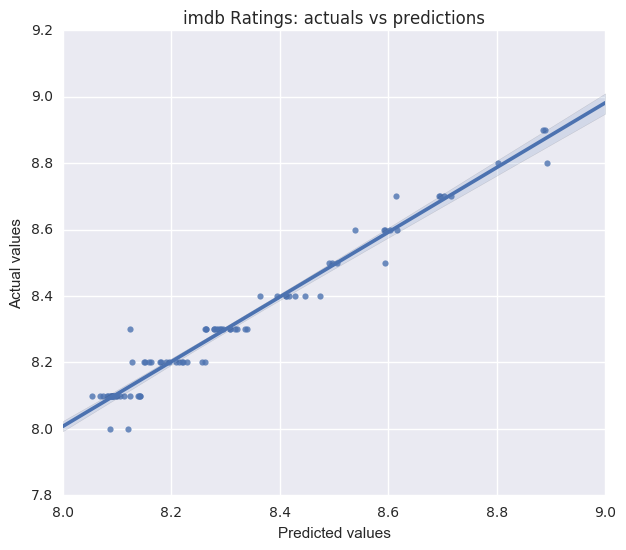

In [375]:
GBR = GradientBoostingRegressor(random_state=1)
GBR.fit(X_train, y_train)
y_pred = GBR.predict(X_test)
print "Score: ", GBR.score(X_test, y_test)

plt.figure(figsize=(7,6))
sns.regplot(y_pred,y_test)
plt.title("imdb Ratings: actuals vs predictions")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

### At this point i realised something was wrong with my input data. Re-cheking I figured out, "Index" was used as one of the features, which was correlating well withe the IMDB rating.
### Deleting the Index Column

In [426]:
dff = IMDB_Data.drop("Unnamed: 0", axis =1)

In [429]:
SS = StandardScaler()

X = SS.fit_transform(dff._get_numeric_data().drop("imdbRating",axis=1))
y = IMDB_Data.imdbRating

In [430]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
GBR = GradientBoostingRegressor(random_state=1)
GBR.fit(X_train, y_train)
y_pred = GBR.predict(X_test)
print "Score: ", GBR.score(X_test, y_test)

Score:  0.317334366289


In [431]:
X.shape

(250, 377)

In [433]:
X_Df = pd.DataFrame(X, columns = dff._get_numeric_data().drop("imdbRating",axis=1).columns)

In [434]:
X_Df.head()

,Metascore,Response,Runtime,Year,imdbVotes,grossRevenue,aamir khan,adrien brody,al pacino,alec guinness,...,special effects,supporting cast,think movie,thought provoking,time watch,ve seen,watch movie,year old,years ago,years old
0,-0.003638,0.0,0.400178,0.411349,3.844560,-0.534835,-0.110208,-0.089803,-0.127515,-0.110208,...,-0.261488,-0.270114,-0.214535,-0.243561,-0.224544,-0.512471,-0.286794,-0.261488,-0.214535,-0.243561
1,2.270044,0.0,1.431888,-0.498350,2.273202,0.376252,-0.110208,-0.089803,7.842194,-0.110208,...,-0.261488,-0.270114,-0.214535,-0.243561,-0.224544,1.951331,3.486817,-0.261488,-0.214535,4.105745
2,-0.003638,0.0,2.276014,-0.415650,1.182675,-0.287055,-0.110208,-0.089803,7.842194,-0.110208,...,-0.261488,-0.270114,-0.214535,-0.243561,-0.224544,-0.512471,-0.286794,-0.261488,-0.214535,-0.243561
3,0.223730,0.0,0.712817,0.990249,3.811471,3.785918,-0.110208,-0.089803,-0.127515,-0.110208,...,-0.261488,-0.270114,-0.214535,-0.243561,-0.224544,1.951331,-0.286794,-0.261488,-0.214535,-0.243561
4,-0.003638,0.0,-1.037962,-1.118599,0.146166,-0.332886,-0.110208,-0.089803,-0.127515,-0.110208,...,-0.261488,-0.270114,-0.214535,-0.243561,-0.224544,-0.512471,-0.286794,3.824265,-0.214535,-0.243561


In [435]:
model_evaluate(DT, "Decision Tree")
model_evaluate(BDT, "Bagging Decision Tree")
model_evaluate(RFR, "Random Forest")
model_evaluate(ABR, "Ada Boost")
model_evaluate(GBR, "Gradient Boosting")

Score for Decision Tree -0.184986183605
Score for Bagging Decision Tree 0.298666564323
Score for Random Forest 0.302922321154
Score for Ada Boost 0.274891655988
Score for Gradient Boosting 0.317334366289


In [436]:
max_score = 0.30
max_i = 5
for i in range(5,378):
    GBR = GradientBoostingRegressor(random_state=1)
    selector = SelectKBest(f_classif, k=i)
    selected_data = selector.fit_transform(X, y)
    Xbest = pd.DataFrame(selected_data)
    X_train, X_test, y_train, y_test = train_test_split(Xbest, y, test_size=0.33, random_state=42)
    
    GBR.fit(X_train, y_train)
    
    score = GBR.score(X_test, y_test)
    
    if score > max_score:
        max_score = score
        max_i = i
print "Kbest features %d with max score %f " %(max_i, max_score)

Kbest features 127 with max score 0.403472 


In [474]:
selector = SelectKBest(f_classif, k=127)

selected_data = selector.fit_transform(X, y)
Xbest = pd.DataFrame(selected_data)

X_train, X_test, y_train, y_test = train_test_split(Xbest, y, test_size=0.33, random_state=42)

Score:  0.403471884706


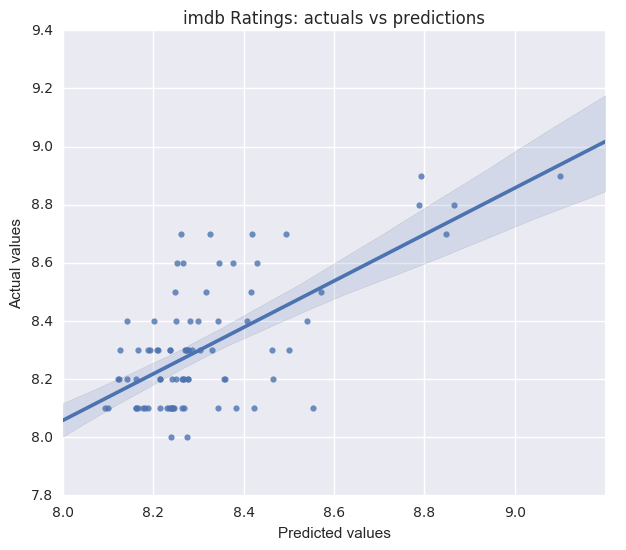

In [438]:
GBR = GradientBoostingRegressor(random_state=1)
GBR.fit(X_train, y_train)
y_pred = GBR.predict(X_test)
print "Score: ", GBR.score(X_test, y_test)

plt.figure(figsize=(7,6))
sns.regplot(y_pred,y_test)
plt.title("imdb Ratings: actuals vs predictions")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

### The best score i got is 0.403 with 127 features.

### some code to get the best Feature names

In [488]:
selector = SelectKBest(f_classif, k=127)
selected_data = selector.fit_transform(X_Df, y)
Xbest = pd.DataFrame(selected_data)
kbest_columns = X_Df.columns[selector.get_support()]
Xbest = pd.DataFrame(selected_data, columns=kbest_columns)
Xbest.columns.values

array(['Metascore', 'Runtime', 'Year', 'imdbVotes', 'grossRevenue',
       'aamir khan', 'al pacino', 'ben kingsley', 'billy dee', 'brad pitt',
       'bruce willis', 'carrie anne', 'carrie fisher', 'christian bale',
       'christopher walken', 'clint eastwood', 'dee williams',
       'diane keaton', 'dicaprio tom', 'eastwood lee', 'edward norton',
       'fisher billy', 'ford carrie', 'hamill harrison', 'hugo weaving',
       'j cobb', 'leonardo dicaprio', 'liam neeson', 'maria volont',
       'mark hamill', 'marlon brando', 'michael caine', 'morgan freeman',
       'noel appleby', 'pacino robert', 'ralph fiennes', 'robert duvall',
       'robert niro', 'sean astin', 'takashi shimura', 'tim roth',
       'tom hanks', 'toshir mifune', 'crime', 'music', 'thriller',
       'western', 'crime.1', 'empire', 'fight', 'friends', 'girl', 'men',
       'old', 'people', 'son', 'way', 'brazil', 'canada', 'iran', 'new.1',
       'spain', 'turkey', 'west', 'zealand', 'czech', 'hebrew', 'italian',


In [489]:
X_train, X_test, y_train, y_test = train_test_split(Xbest, y, test_size=0.33, random_state=42)
GBR = GradientBoostingRegressor(random_state=1)
GBR.fit(X_train, y_train)
y_pred = GBR.predict(X_test)
print "Score: ", GBR.score(X_test, y_test)

Score:  0.403471884706


In [497]:
imp_features_df = pd.DataFrame(GBR.feature_importances_, index=Xbest.columns.values)
imp_features_df.head()

,0
Metascore,0.069325
Runtime,0.060788
Year,0.113975
imdbVotes,0.268961
grossRevenue,0.113855


In [500]:
imp_features_df.sort(0, ascending=[False]).head(20)

/Users/Shreyas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,0
imdbVotes,0.268961
Year,0.113975
grossRevenue,0.113855
Metascore,0.069325
Runtime,0.060788
girl,0.024642
aamir khan,0.019484
great,0.016736
truly,0.013674
hard,0.013206
